In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
 
set_matplotlib_formats ('png')

/tmp/ipykernel_6285/4294946217.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats ('png')


In [2]:
y = [2400, 1212, 820, 650, 530, 480]
x = [i + 1 for i in range(6)]

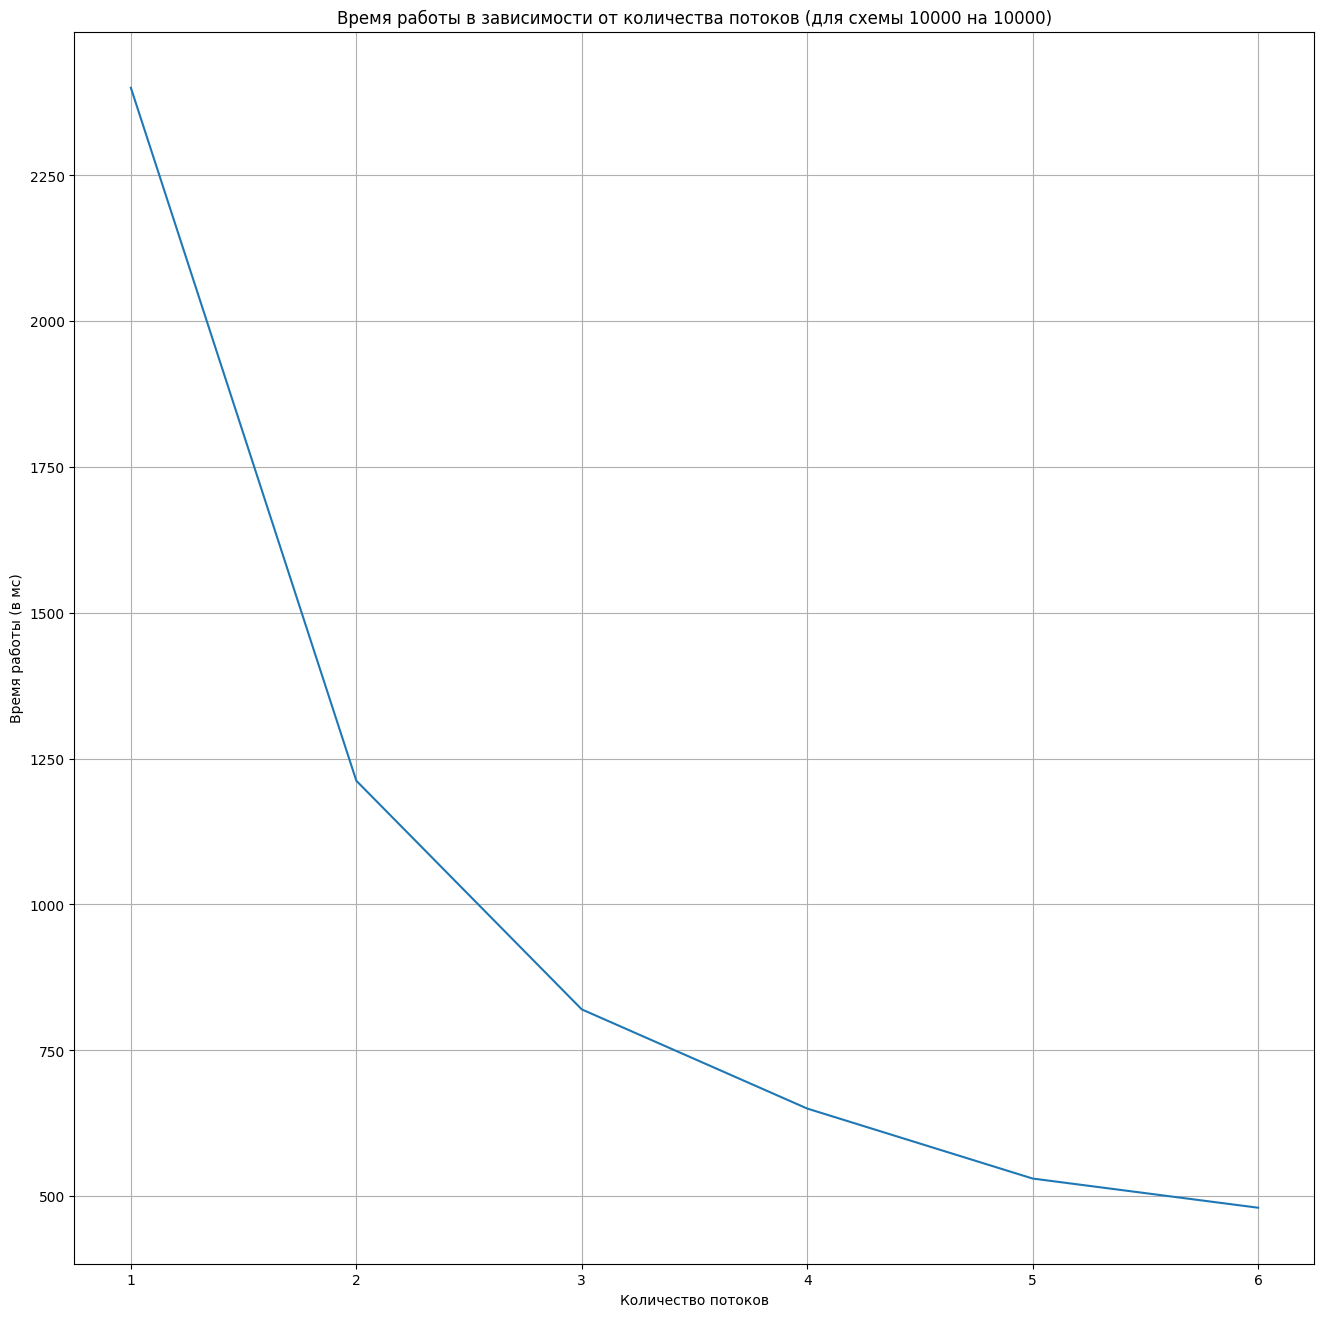

In [3]:
plt.figure(figsize=(16,16))
ax1 = plt.axes()

plt.plot (x, y)

ax1.set_title ("Время работы в зависимости от количества потоков (для схемы 10000 на 10000)")
ax1.set_xlabel ("Количество потоков")
ax1.set_ylabel ("Время работы (в мс)")

plt.grid()
# plt.legend()

plt.savefig("../picturies/graph1.png", dpi=100)
plt.show()

In [4]:
x = [1000 * i for i in range(1, 16)]
y1 = []
y6 = []

with open('res.csv', encoding="utf-8") as f:
    if (f.readline() != "start\n"):
        print ("incorrect file")

    for i in range(15):
        y1.append (int(f.readline()))
        y6.append (int(f.readline()))

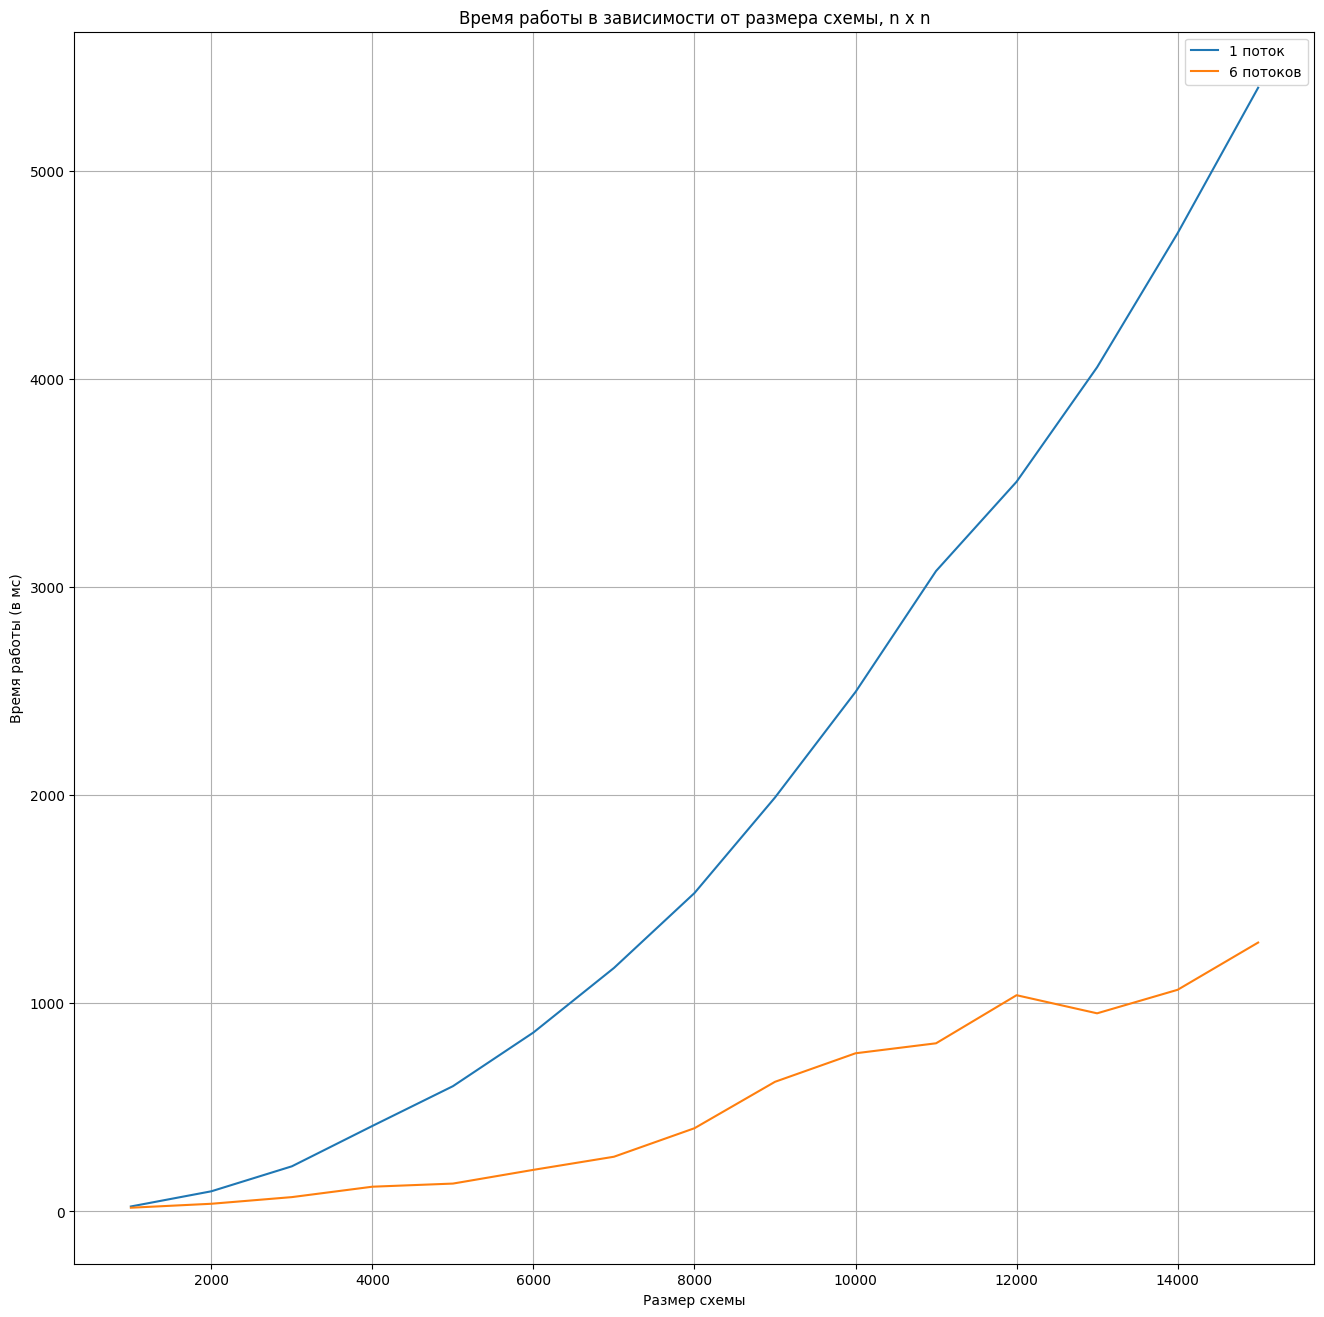

In [5]:
plt.figure(figsize=(16,16))
ax1 = plt.axes()

plt.plot (x, y1, label="1 поток")

plt.plot (x, y6, label="6 потоков")

ax1.set_title ("Время работы в зависимости от размера схемы, n x n")
ax1.set_xlabel ("Размер схемы")
ax1.set_ylabel ("Время работы (в мс)")

plt.grid()
plt.legend()

plt.savefig("../picturies/graph2.png", dpi=100)
plt.show()

In [6]:
data = pd.read_csv ("../data.csv", sep=" ", header=None).to_numpy()

size = int(data[-1][0])
T    = data[-1][1]
X    = data[-1][2]

data = data[:-1]
data = data.T[:-1].T

initial_x = np.linspace (0, X, size)
initial_t = np.linspace (0, T, size)

x = []
t = []
u = []
col = []

u_max = np.max(data)
u_min = np.min(data)

for i in range(size):
    for j in range(size):
        x.append (initial_x[j])
        t.append (initial_t[i])
        u.append(data[i][j])

        blue = (u_max - data[i][j]) / (u_max - u_min)
        red  = (data[i][j] - u_min) / (u_max - u_min)
        col.append((red, 0, blue))

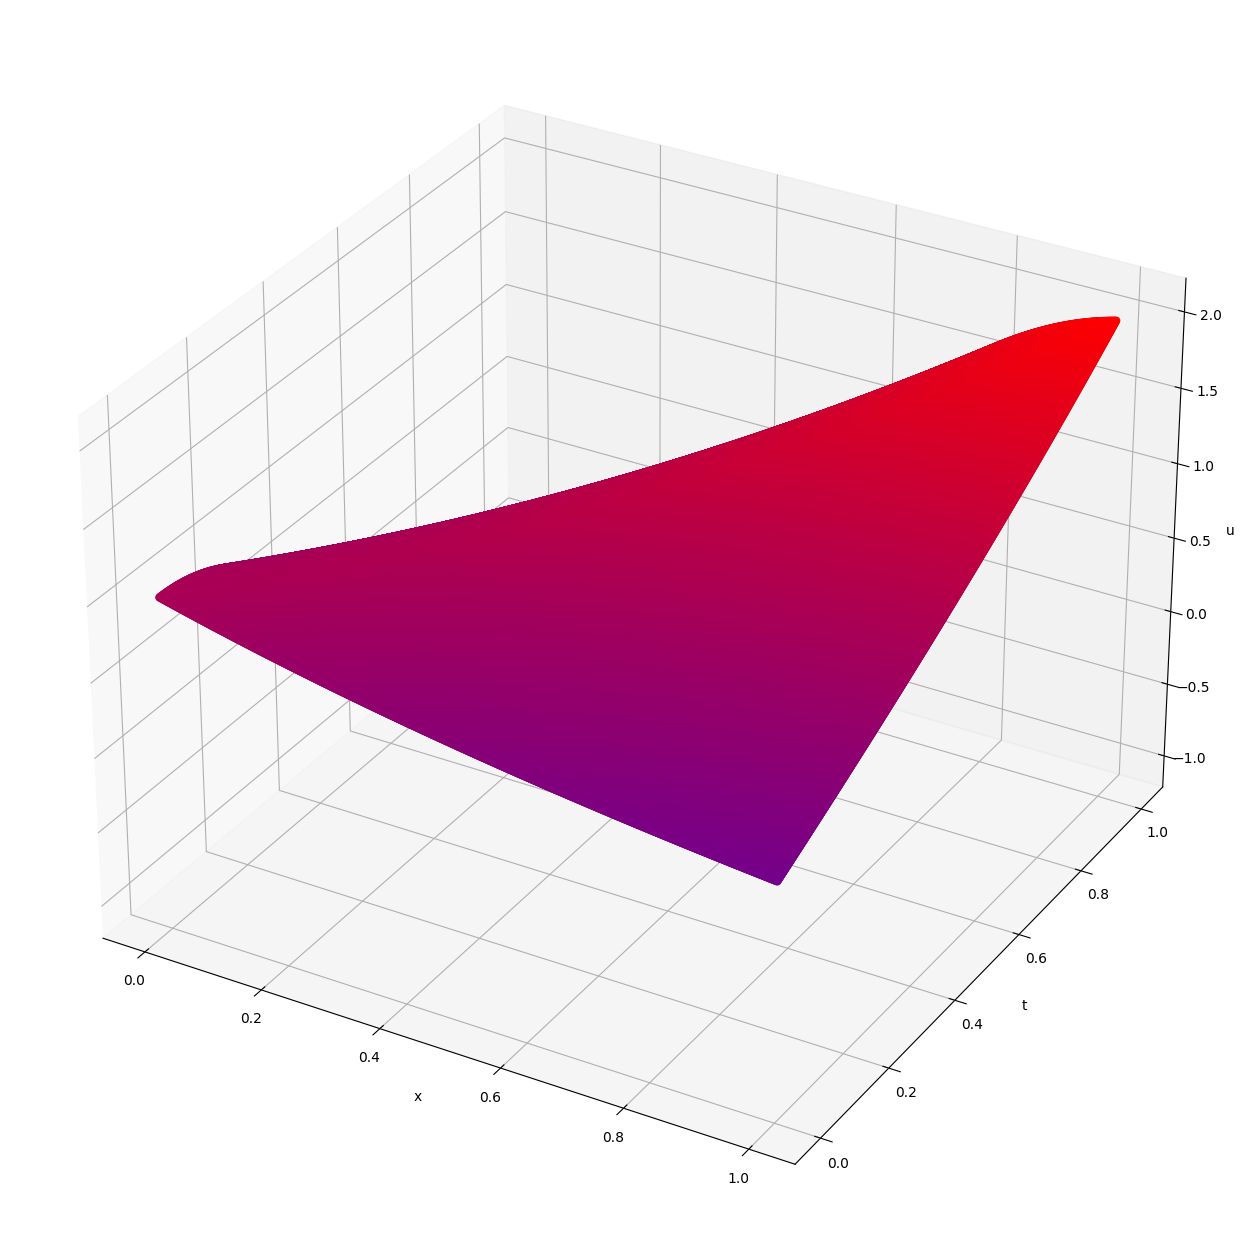

In [8]:
plt.figure(figsize=(16,16))
ax1 = plt.axes(projection = '3d')

ax1.set_xlabel("x")
ax1.set_ylabel("t")
ax1.set_zlabel("u")
ax1.scatter3D(x, t, u, c=col)

# plt.grid()
# plt.legend()
# plt.savefig("../picturies/graph3.png", dpi=100)
plt.show()